In [374]:
import pandas as pd

maria = pd.read_csv('events_in_maria_dE.txt', sep=' ', names=['evt', 'dE'])

mattia = pd.read_csv('events_in_mattia.txt', sep=' ', names=['evt', 'dE'])

maria = maria.sort_values('evt')
mattia = mattia.sort_values('evt')

In [375]:
mattia[mattia.evt==565].head()

,evt,dE
150,565,-0.589506


In [376]:
maria[maria.evt==565].head()

,evt,dE
133,565,0


In [377]:
maria.evt.shape, mattia.evt.shape

((540,), (591,))

In [378]:
mattia[~mattia.evt.isin(maria.evt)].evt

301     1026
302     1026
159     1277
172     1327
281     1636
554     3788
90      3971
91      3997
261     4160
260     4160
426     4473
229     4562
429     4886
496     5428
498     5445
211     5917
359     6108
477     6895
507     7013
144     8629
145     8633
146     8649
71      9380
395     9492
316     9584
197    10004
198    10022
169    10576
130    11139
131    11146
64     11549
47     11841
122    13659
123    13668
245    13725
446    14535
95     14837
588    15357
541    15473
543    15484
208    15610
209    15628
119    15907
120    15913
121    15947
294    16754
80     16878
524    17302
525    17306
526    17336
527    17336
Name: evt, dtype: int64

In [379]:
maria[~maria.evt.isin(mattia.evt)].evt.values

array([], dtype=int64)

In [380]:
for A, B in zip(mattia[mattia.evt.isin(maria.evt)].dE.unique(), maria[maria.evt.isin(mattia.evt)].dE.unique()):
    print(A == B, end=', ')

False, 

In [381]:
for i in mattia.evt.isin(maria.evt):
    print(i, end=', ')

True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, Tru

In [382]:
import uproot
data = uproot.open('tests_mattia.root:ana/test').arrays(library='pd')
data = data.sort_values('event')

In [383]:
data[data.mattia != data.maria].event.values

array([], dtype=float64)

In [384]:
data[(data.mattia == 2) & (data.maria == 0)]

,event,mattia,maria


In [385]:
data[(data.mattia == 3) & (data.maria == 0)]

,event,mattia,maria


In [386]:
data[(data.mattia == 1) & (data.maria == 0)]

,event,mattia,maria


In [387]:
data[(data.mattia == 2) & (data.maria == 2)]

,event,mattia,maria


In [388]:
data.describe()

,event,mattia,maria
count,8244.000000,8244.000000,8244.000000
mean,8751.386584,-9530.833778,-9530.833778
std,5029.323740,2112.461380,2112.461380
min,51.000000,-9999.000000,-9999.000000
25%,4428.250000,-9999.000000,-9999.000000
50%,8615.000000,-9999.000000,-9999.000000
75%,13077.500000,-9999.000000,-9999.000000
max,17500.000000,0.112337,0.112337


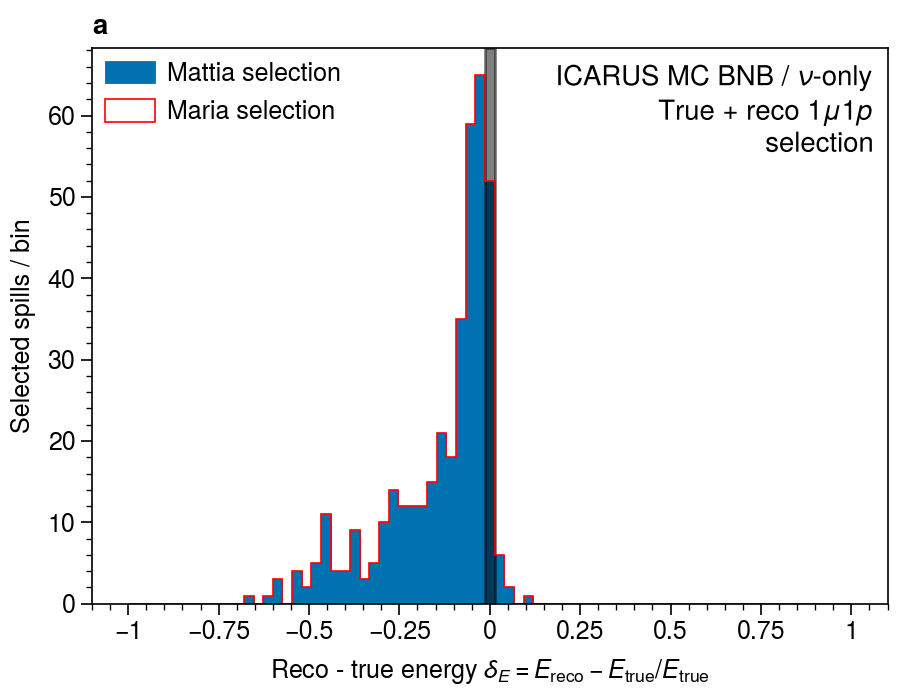

In [389]:

import uproot

import pandas as pd
import ultraplot as plot

import matplotlib as mpl
import matplotlib.pyplot as plt

import mplhep as hep

import numpy as np

plot.rc['figure.facecolor'] = 'none'
plot.rc['savefig.facecolor'] = 'none'
plot.rc['legend.frameon'] = False
plot.rc['axes.autolimit_mode'] = 'data'

dE_bins=np.linspace(-1., 1., 76)
# dE_bins=np.concatenate([dE_bins, np.array([1.])])

fig, ax = plot.subplots(
    width=4.5, height=3.5, ncols=1, nrows=1, 
    xlabel=r'Reco energy $E_\text{reco}^\nu$', ylabel=f'Selected spills / bin',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    # titlesize=9,
    urtitle='ICARUS MC BNB / $\\nu$-only\nTrue + reco $1\\mu 1p$\nselection'# , yscale='log',
)

ax.hist(data.mattia, bins=dE_bins, label='Mattia selection')
ax.hist(data.maria, bins=dE_bins, label='Maria selection', color='r', fill=False)
ax.format(xlabel=r'Reco - true energy $\delta_E = E_\text{reco}-E_\text{true}/E_\text{true}$')

xmin = np.diff(dE_bins)[0]
ax.axvspan(-xmin/2, +xmin/2, color='k', alpha=0.5, lw=1)

ax.legend(loc='ul', ncol=1)

In [390]:
for e in data[data.mattia != data.maria].event.values:
    print(f'{e = }, with value (mattia, maria) = {data[data.event==e].mattia.values, data[data.event==e].maria.values}')

In [391]:
(data.mattia > -2).sum(), (data.maria > -2).sum()

(np.int64(386), np.int64(386))